In [103]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn import preprocessing 
from scipy.io import arff


In [104]:
data = arff.loadarff("./dataset/Medicaldataset.arff")
df = pd.DataFrame(data[0])
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64.0,1.0,66.0,160.0,83.0,160.0,1.80,0.012,b'negative'
1,21.0,1.0,94.0,98.0,46.0,296.0,6.75,1.060,b'positive'
2,55.0,1.0,64.0,160.0,77.0,270.0,1.99,0.003,b'negative'
3,64.0,1.0,70.0,120.0,55.0,270.0,13.87,0.122,b'positive'
4,55.0,1.0,64.0,112.0,65.0,300.0,1.08,0.003,b'negative'


In [105]:
#Normalizing and transforming the data
X = df.iloc[:,df.columns !='class'] #select all features except for class
# X = df.iloc[:,df.columns !='class'].to_numpy() #select all features except for class

# Option 1: Normalize the data
#X_1 = preprocessing.normalize(X, axis=1) #normalizing the features
#X_1 = pd.DataFrame(X_1, columns=df.columns[:-1]) #transforming the normalized features to dataframe, w/o the class

# Option 2: MinMaxScaler
#X_1 = MinMaxScaler().fit_transform(X)
#X_1 = pd.DataFrame(X_1, columns=df.columns[:-1]) #transforming the normalized features to dataframe, w/o the class

X_1 = X
print(X_1)
y = df['class'].str.decode('utf-8') #transform byte to string 
#print(y)
mapping = {'negative': 0, 'positive': 1} #mapping the string to int
y = y.replace(mapping).to_numpy()  #transform string to int
#print(X.shape) (1319, 8) 


       age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
0     64.0     1.0     66.0          160.0         83.0    160.0   1.80   
1     21.0     1.0     94.0           98.0         46.0    296.0   6.75   
2     55.0     1.0     64.0          160.0         77.0    270.0   1.99   
3     64.0     1.0     70.0          120.0         55.0    270.0  13.87   
4     55.0     1.0     64.0          112.0         65.0    300.0   1.08   
...    ...     ...      ...            ...          ...      ...    ...   
1314  44.0     1.0     94.0          122.0         67.0    204.0   1.63   
1315  66.0     1.0     84.0          125.0         55.0    149.0   1.33   
1316  45.0     1.0     85.0          168.0        104.0     96.0   1.24   
1317  54.0     1.0     58.0          117.0         68.0    443.0   5.80   
1318  51.0     1.0     94.0          157.0         79.0    134.0  50.89   

      troponin  
0        0.012  
1        1.060  
2        0.003  
3        0.122  
4        0.003

In [106]:
#Check unique count of each class y
np.unique(y, return_counts=True)


(array([0, 1], dtype=int64), array([509, 810], dtype=int64))

In [ ]:
#Visualizing the data
# df_1 = pd.DataFrame(X, columns=X.columns)
# df_1["class"] = pd.Series(y)
# print(X.columns)
# sns.pairplot(df_1, hue="class", palette="tab10")

In [ ]:
# kf=KFold(n_splits=5, random_state=1, shuffle=True)
# score=cross_validate(LogisticRegression(solver="liblinear", random_state= 0),X_1,y,cv=kf, scoring = ['accuracy','f1_macro','precision','recall'])

# print('Accuracy: %.4f (std: %.3f)' % (np.mean(score['test_accuracy']), np.std(score['test_accuracy'])))
# print('F1 Score : %.4f' % (np.mean(score['test_f1_macro'])))
# print('Precision : %.4f' % (np.mean(score['test_precision'])))
# print('Recall : %.4f' % (np.mean(score['test_recall'])))


In [ ]:
# Oversampling to balance the data
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X_1, y)
# from collections import Counter
# print(sorted(Counter(y_resampled).items()))

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.33, random_state=42) 

In [108]:
#Perform feature extraction using Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

# Loop over different values of n_estimators
for n_trees in [50, 100, 200, 500]:
    # Create RandomForestClassifier with current n_estimators
    forest = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    
    # Use cross_val_score for evaluation
    scores = cross_val_score(forest, X_1, y, cv=5)  # 5-fold cross-validation
    mean_score = scores.mean()
    
    print(f"n_estimators={n_trees}, Mean Cross-Validation Score: {mean_score}")



n_estimators=50, Mean Cross-Validation Score: 0.9863607558474479
n_estimators=100, Mean Cross-Validation Score: 0.9863607558474479
n_estimators=200, Mean Cross-Validation Score: 0.9863607558474479
n_estimators=500, Mean Cross-Validation Score: 0.9856002995736837


In [109]:
#Create and train a random forest
forest= RandomForestClassifier(n_estimators= 200, random_state= 42)
forest.fit(X_train, y_train)

#Get the most important features
forest_feats= SelectFromModel(forest, threshold= 'median')
forest_feats.fit(X_train, y_train)

#Get training and development sets that have only the most important features
x_train_forest= forest_feats.transform(X_train)
x_devel_forest= forest_feats.transform(X_test)

#See which features were retained
for i in forest_feats.get_support(indices= True):
    print(X_train.columns[i])

age
glucose
kcm
troponin


In [110]:
#Create new dataframes with only the most important features
X_2 = X_1[["age", "glucose", "kcm", "troponin"]]
print(X_2)

       age  glucose    kcm  troponin
0     64.0    160.0   1.80     0.012
1     21.0    296.0   6.75     1.060
2     55.0    270.0   1.99     0.003
3     64.0    270.0  13.87     0.122
4     55.0    300.0   1.08     0.003
...    ...      ...    ...       ...
1314  44.0    204.0   1.63     0.006
1315  66.0    149.0   1.33     0.172
1316  45.0     96.0   1.24     4.250
1317  54.0    443.0   5.80     0.359
1318  51.0    134.0  50.89     1.770

[1319 rows x 4 columns]


In [111]:
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit

[[6.400e+01 1.600e+02 1.800e+00 1.200e-02]
 [2.100e+01 2.960e+02 6.750e+00 1.060e+00]
 [5.500e+01 2.700e+02 1.990e+00 3.000e-03]
 ...
 [4.500e+01 9.600e+01 1.240e+00 4.250e+00]
 [5.400e+01 4.430e+02 5.800e+00 3.590e-01]
 [5.100e+01 1.340e+02 5.089e+01 1.770e+00]]


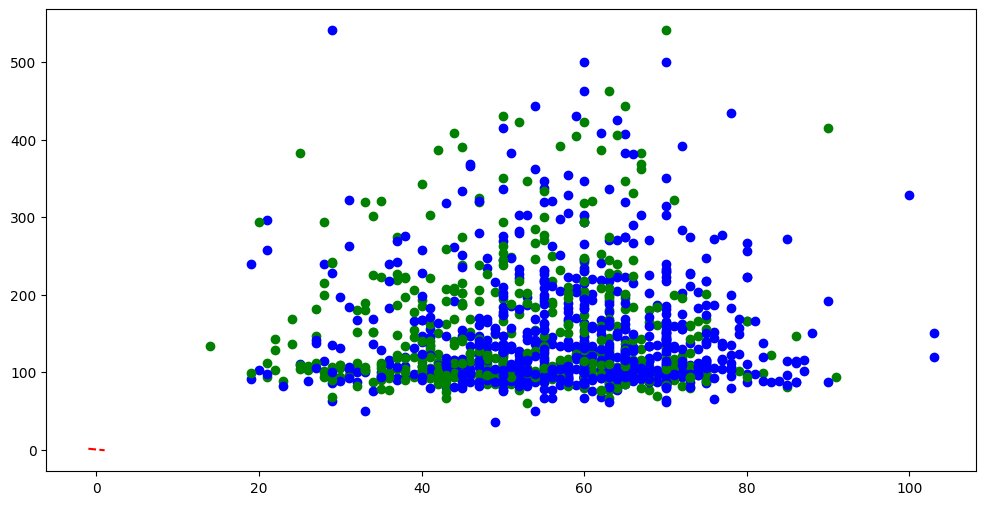

In [112]:
num_inputs = 4
num_samples = 1319
qc_X = X_2.to_numpy()
print(qc_X)
qc_y = y

# plot positive and negative using matplotlib function
for x, y_target in zip(qc_X, qc_y):
    if y_target == 1:
        plt.plot(x[0], x[1], 'bo') #positive 
    else:
        plt.plot(x[0], x[1], 'go') #negative
plt.plot([-1, 1], [1, -1], '--', color = "red")
plt.show()

In [113]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# features = preprocessing.normalize(X_2)
features = preprocessing.quantile_transform(X_2)

print(features)

[[0.7007007  0.71471471 0.29029029 0.45645646]
 [0.00600601 0.94171965 0.78128128 0.90375316]
 [0.43843844 0.92092092 0.33533534 0.07507508]
 ...
 [0.20620621 0.21871872 0.12712713 0.98371691]
 [0.40640641 0.99499499 0.74938614 0.83069302]
 [0.34884885 0.61011011 0.93793794 0.94521619]]


In [114]:
#Training a classical machine learning model, source: (https://qiskit.org/ecosystem/machine-learning/tutorials/02a_training_a_quantum_model_on_a_real_dataset.html)
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
X_train, X_test, y_train, y_test = train_test_split(
    features, y, train_size=0.8, random_state=algorithm_globals.random_seed)
X_train, y_train 

(array([[0.73223223, 0.81931932, 0.38788789, 0.07507508],
        [0.63413413, 0.01101101, 0.85544379, 0.81948981],
        [0.89439439, 0.72322322, 0.55705706, 0.53253253],
        ...,
        [0.31631632, 0.8973974 , 0.56756757, 0.95734034],
        [0.07507508, 0.18168168, 0.31881882, 0.07507508],
        [0.66916917, 0.8048048 , 0.73981963, 0.22022022]]),
 array([0, 1, 1, ..., 1, 0, 0], dtype=int64))

In [115]:
#Train a classical Support Vector Classifier
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(X_train, y_train)  # suppress printing the return value

In [116]:
train_score_c4 = svc.score(X_train, y_train)
test_score_c4 = svc.score(X_test, y_test)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.97
Classical SVC on the test dataset:     0.95


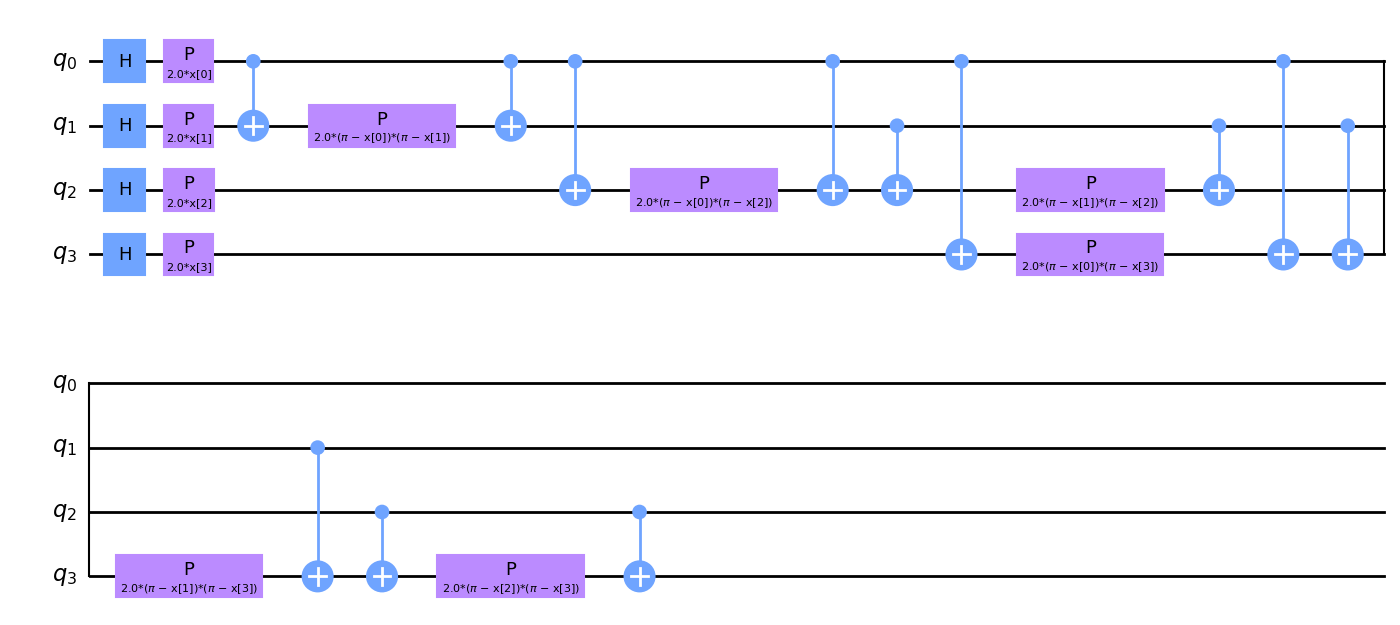

In [118]:
#Training a Quantum Machine Learning Model

num_features = X_2.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

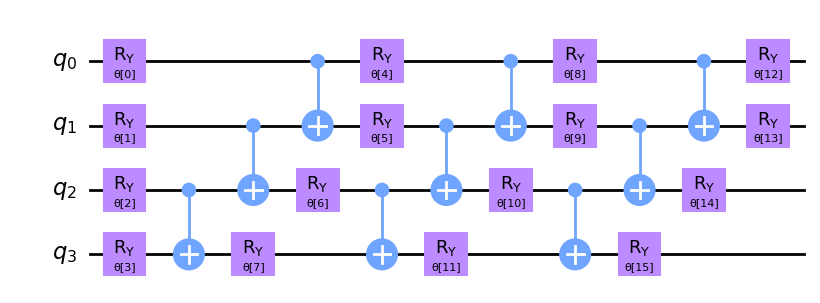

In [119]:
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [98]:
optimizer = COBYLA(maxiter=100)

In [120]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [121]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

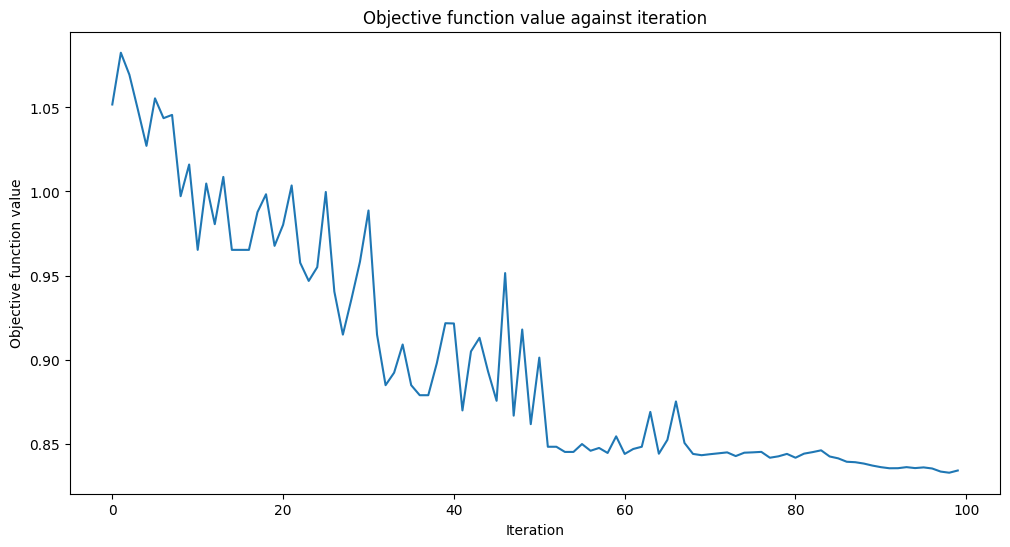

Training time: 1798 seconds


In [122]:
import time

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [124]:
train_score_q4 = vqc.score(X_train, y_train)
test_score_q4 = vqc.score(X_test, y_test)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.69
Quantum VQC on the test dataset:     0.67


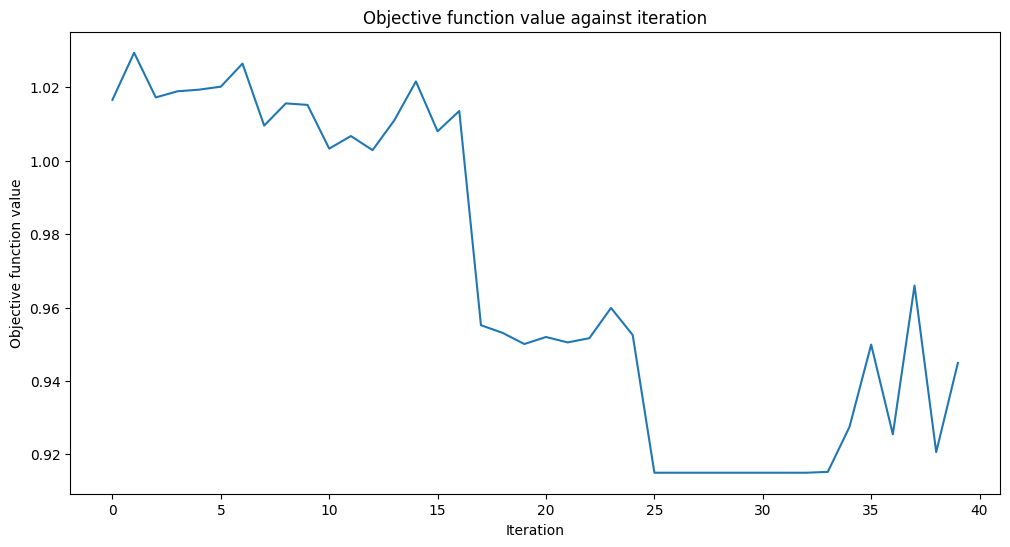

Training time: 1086 seconds


In [125]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [126]:
train_score_q2_eff = vqc.score(X_train, y_train)
test_score_q2_eff = vqc.score(X_test, y_test)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.65
Quantum VQC on the test dataset using EfficientSU2:     0.64


In [143]:
# PCA
from sklearn.decomposition import PCA

features_2 = PCA(n_components=2).fit_transform(features)
print(features_2)

[[ 13.24581052 -10.52819889]
 [148.28179155  19.37596469]
 [123.18517043  -9.5215498 ]
 ...
 [-51.21844045   7.54081457]
 [295.98231679 -11.56227773]
 [-11.19402424  14.01583407]]


In [144]:

X_train, X_test, y_train, y_test = train_test_split(
    features_2, y, train_size=0.8, random_state=algorithm_globals.random_seed)

svc.fit(X_train, y_train)

train_score_c2 = svc.score(X_train, y_train)
test_score_c2 = svc.score(X_test, y_test)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.62
Classical SVC on the test dataset:     0.61


In [145]:
num_features = features_2.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)


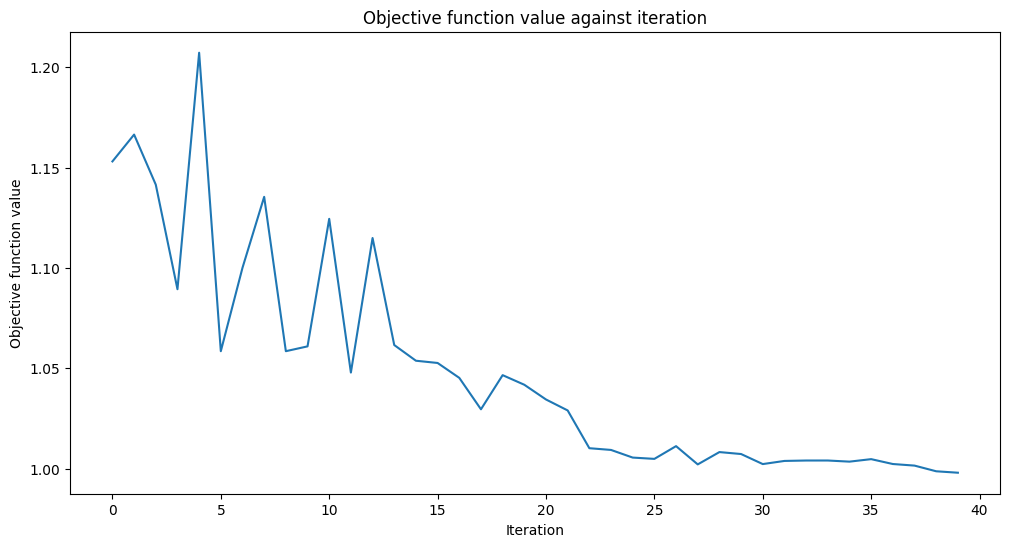

Training time: 229 seconds


In [146]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")


In [147]:
train_score_q2_ra = vqc.score(X_train, y_train)
test_score_q2_ra = vqc.score(X_test, y_test)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.52
Quantum VQC on the test dataset using RealAmplitudes:     0.52
